# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.svm import SVC
from xgboost import XGBClassifier
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer


plt.style.use('ggplot')

In [2]:
# Importing the dataframe
df = pd.read_csv('recipe_site_traffic_2212.csv')

# Checking the first five rows of the dataframe
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


# Data Validation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [4]:
# Cheking if the recipe there are no duplicate recipes
df.duplicated(subset='recipe').sum()

0

In [5]:
# Checking the values in the servings column to make them numeric
df['servings'].value_counts()

servings
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: count, dtype: int64

In [6]:
# Cleaned the servinga columns to remove " as a snack" when needed and made the serving column numeric
df['servings'] = df['servings'].str.replace(" as a snack", "").astype(int)

In [7]:
# Cheking the category column
df['category'].value_counts()

category
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: count, dtype: int64

In [8]:
# I converted the "Chiken Breast" values to "Chicken" since they logically belong together
df['category'] = df['category'].str.replace('Chicken Breast', 'Chicken') 
df['category'] = df['category'].astype('category')

In [9]:
df['category'].value_counts()

category
Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Dessert           83
Vegetable         83
Meat              79
One Dish Meal     71
Name: count, dtype: int64

In [10]:
# Cheking the high_traffic column
df['high_traffic'].value_counts()

high_traffic
High    574
Name: count, dtype: int64

In [11]:
df['high_traffic'] = df['high_traffic'].map({'High': True, np.nan: False})

In [12]:
# Cheking the null/missing values 
df[df.isnull().any(axis=1)]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,True
23,24,NaN,NaN,NaN,NaN,Meat,2,False
48,49,NaN,NaN,NaN,NaN,Chicken,4,False
82,83,NaN,NaN,NaN,NaN,Meat,4,True
89,90,NaN,NaN,NaN,NaN,Pork,6,True
116,117,NaN,NaN,NaN,NaN,Chicken,6,True
121,122,NaN,NaN,NaN,NaN,Dessert,2,True
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,True
149,150,NaN,NaN,NaN,NaN,Potato,2,True
187,188,NaN,NaN,NaN,NaN,Pork,4,True


In [13]:
# Number of missing rows
df[df.isnull().any(axis=1)].shape[0]

52

In [14]:
# Calculating the percentage of the missing rows
per_missing = len(df[df.isnull().any(axis=1)])/len(df) * 100
print(f'The percentage of missing rows is: {round(per_missing)}%')

The percentage of missing rows is: 5%


Since about five percentage of the data is missing and they all missing in four columns calories,	carbohydrate,	sugar and	protein
I decided to drop the missing columns

In [15]:
df = df.dropna().reset_index(drop=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        895 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      895 non-null    category
 6   servings      895 non-null    int32   
 7   high_traffic  895 non-null    bool    
dtypes: bool(1), category(1), float64(4), int32(1), int64(1)
memory usage: 40.7 KB


In [17]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,473.652514,435.939196,35.069676,9.046547,24.149296,3.458101
std,272.763283,453.020997,43.949032,14.679176,36.369739,1.735979
min,2.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000,2.000000
50%,475.000000,288.550000,21.480000,4.550000,10.800000,4.000000
75%,708.500000,597.650000,44.965000,9.800000,30.200000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


From the description table we can see that the numerical columns don't have any value below zero 
-- which would have invalidated that particular row/data.

### Summary of Data Validation

- **Duplicate Removal**: Checked for and removed duplicate recipes — specifically, entries with different recipe names but identical values across all other columns.

- **Servings Column Cleaning**: Cleaned the `servings` column by stripping non-numeric characters (e.g., strings like "servings") and converting the column to a numerical data type.

- **High Traffic Label Handling**: Filled missing values in the `high_traffic` column by assuming:
  - `"True"` indicates high traffic
  - `"False"` indicates low traffic

- **Category Standardization**: Merged the `'chicken breast'` category into `'chicken'` to maintain logical consistency in the recipe categories.

- **Missing Data**: About 52 rows (around 5% of the dataset) with missing values in the `calories`, `carbohydrate`, `sugar`, and `protein` columns. These rows were dropped to maintain data quality without significantly impacting the dataset size.


# Data Visualization

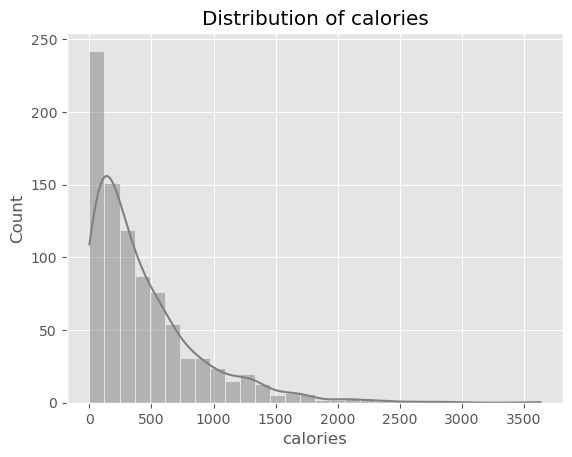

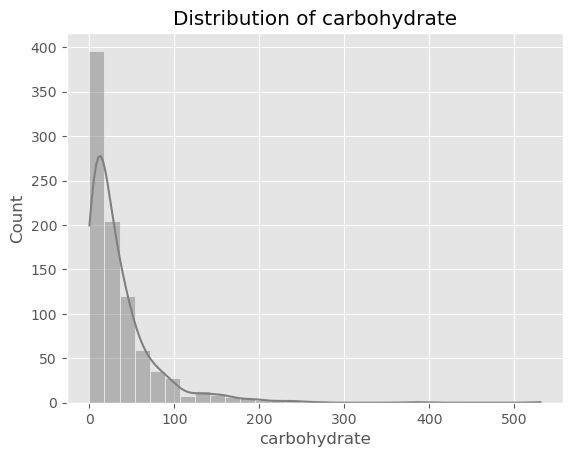

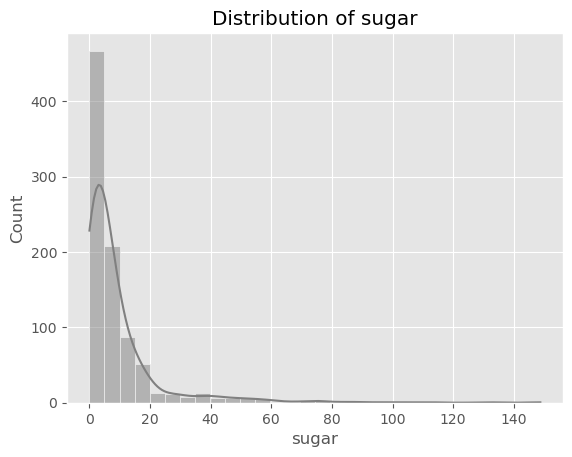

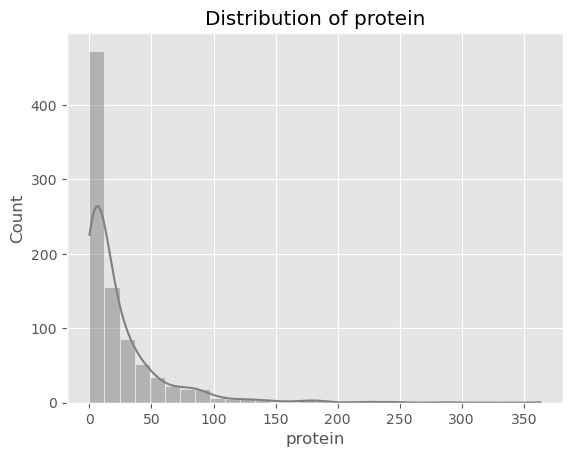

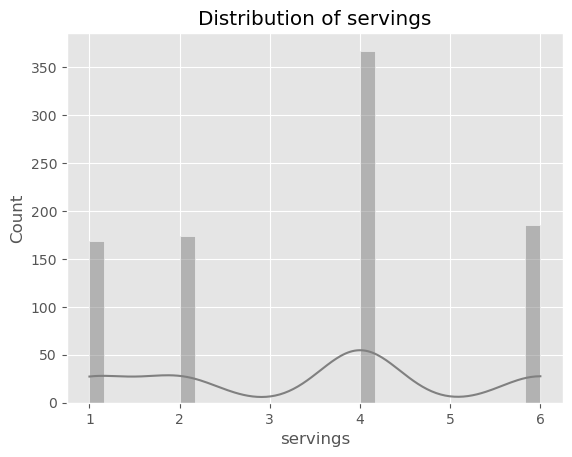

In [18]:
# Single variable plots
# Distribution of the numerical columns in the dataset
num_cols = df.select_dtypes(include=['int', 'float']).columns

for i in num_cols:
    if i == 'recipe':
        continue
    sns.histplot(df[i], bins=30, kde=True, color='gray')
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

#plot_cols

# Exclude 'recipe' column
plot_cols = [col for col in num_cols if col != 'recipe' and col != 'servings']

# Set up the figure
fig, axes = plt.subplots(len(plot_cols), 1, figsize=(8, 4 * len(plot_cols)))

# If there's only one numeric column (other than 'recipe'), axes may not be iterable
if len(plot_cols) == 1:
    axes = [axes]

# Plot each feature
for ax, col in zip(axes, plot_cols):
    sns.histplot(X_train[col], bins=30, kde=True, color='gray', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.savefig('skewed_dist_1.png')
plt.show()


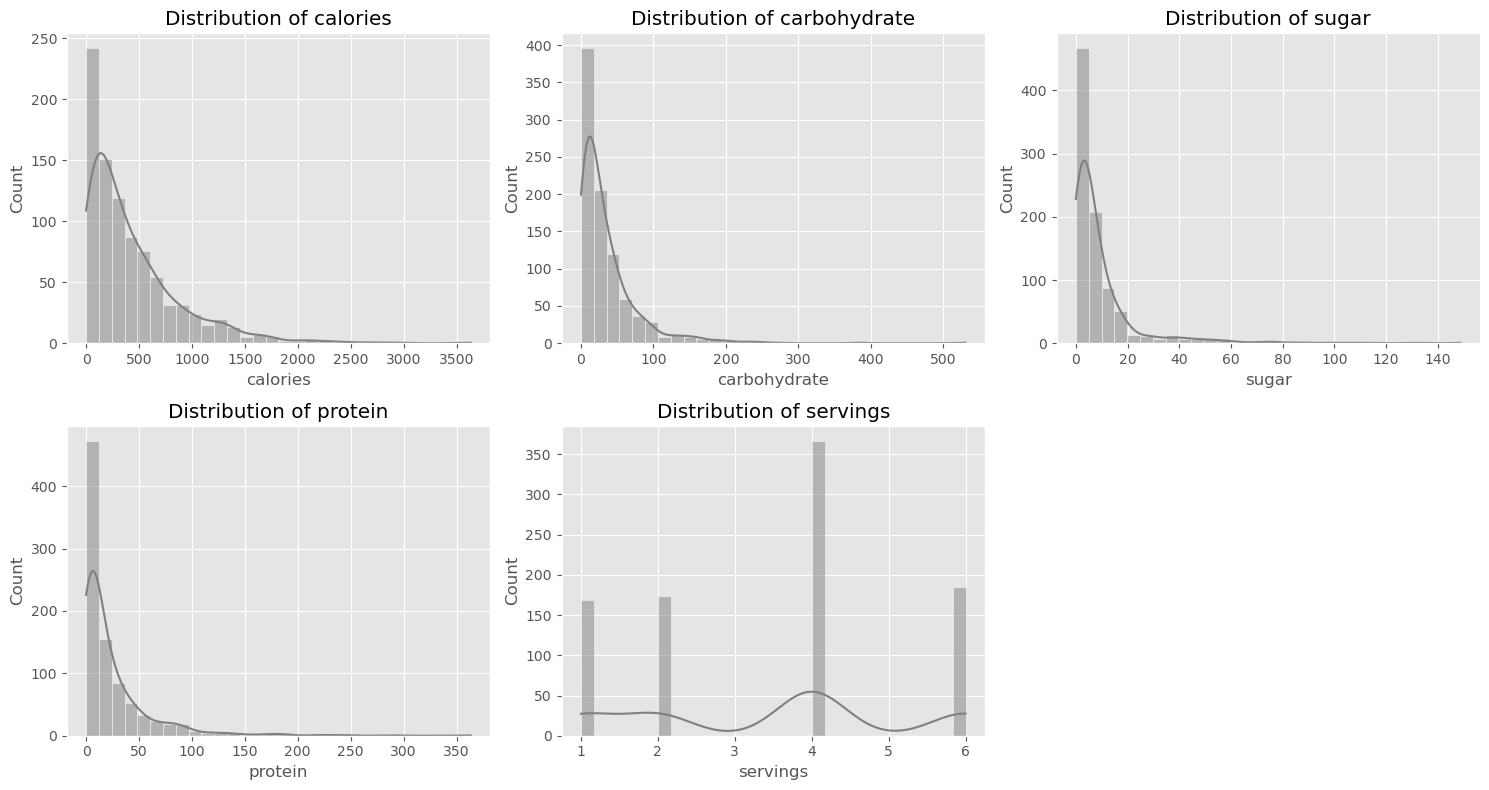

In [19]:
# Select numerical columns (excluding 'recipe')
num_cols = df.select_dtypes(include=['int', 'float']).columns
num_cols = [col for col in num_cols if col != 'recipe']

# Determine subplot grid size
n_cols = 3  # number of plots per row
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # Flatten to 1D for easy indexing

# Plot each numerical column
for idx, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, color='gray', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')

# Turn off unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])  # remove empty plots

plt.tight_layout()
plt.savefig('Distribution.png')
plt.show()

From the visualization above, it can be observed that the variables/columns; calories, carbohydrate, sugar and protein are right-skewed/positively skewed.
Which means that the mean would be affected by the few large values and the median will be less sensitive to this.

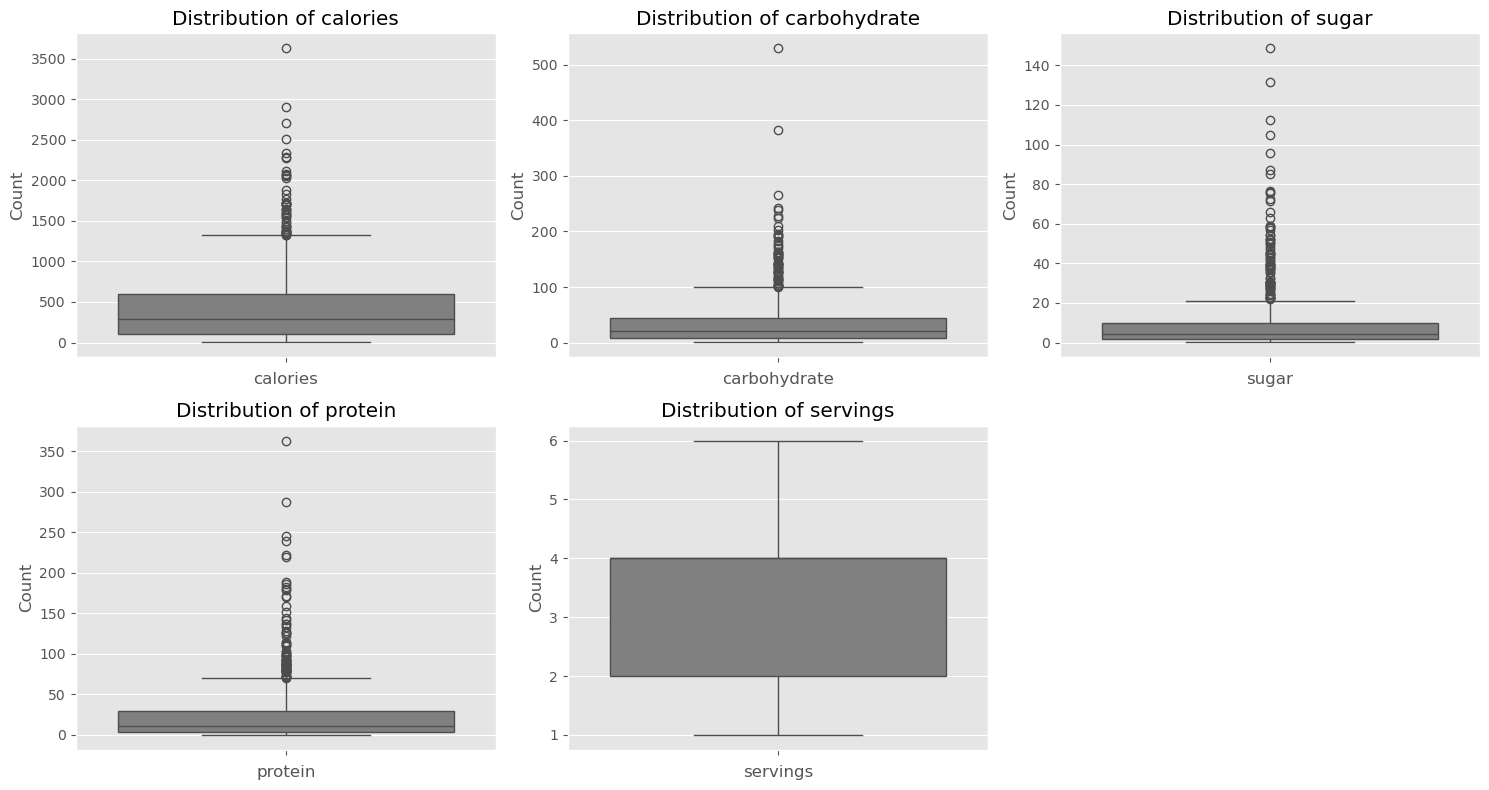

In [20]:
# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # Flatten to 1D for easy indexing

# Plot each numerical column
for idx, col in enumerate(num_cols):
    sns.boxplot(df[col], color='gray', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')

# Turn off unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])  # remove empty plots

plt.tight_layout()
plt.savefig('boxplot.png')
plt.show()


The boxplots clearly highlights the presence of outliers in the calories, carbohydrate, sugar, and protein columns.
These outliers contribute to the right-skewed nature of the distributions. 
As a result, using the median — which is less sensitive to extreme values 
provides a more reliable measure of central tendency for these columns and is better suited for our analysis.


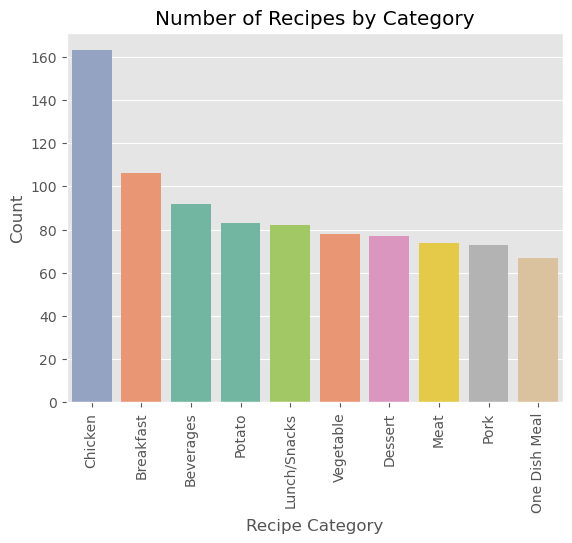

In [21]:
# Recipe Count by Category
sns.countplot(data=df, x='category', order=df['category'].value_counts().index, palette='Set2', hue='category')
plt.xticks(rotation=90)
plt.title('Number of Recipes by Category')
plt.xlabel('Recipe Category')
plt.ylabel('Count')
plt.show()


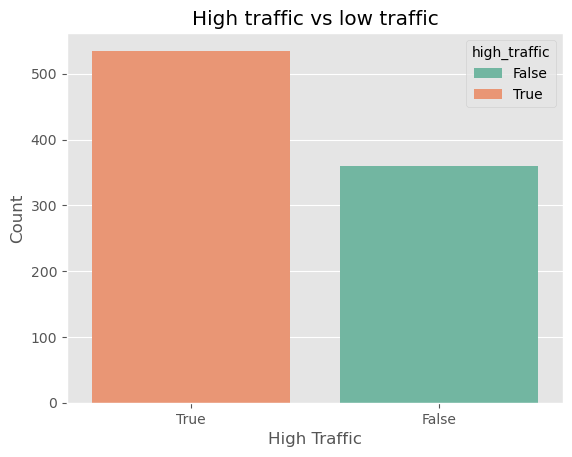

In [22]:
sns.countplot(data=df, x='high_traffic', order=df['high_traffic'].value_counts().index, palette='Set2', hue='high_traffic')
plt.title('High traffic vs low traffic')
plt.xlabel('High Traffic')
plt.ylabel('Count')
plt.show()

In [23]:
# Median of the calories, carbohydrate, sugar, and protein columns by category
col_med = df.groupby(['category'])[['calories', 'carbohydrate', 'sugar', 'protein']].agg('median').reset_index()

C:\Users\Imago DEI\AppData\Local\Temp\ipykernel_19184\1906110487.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  col_med = df.groupby(['category'])[['calories', 'carbohydrate', 'sugar', 'protein']].agg('median').reset_index()


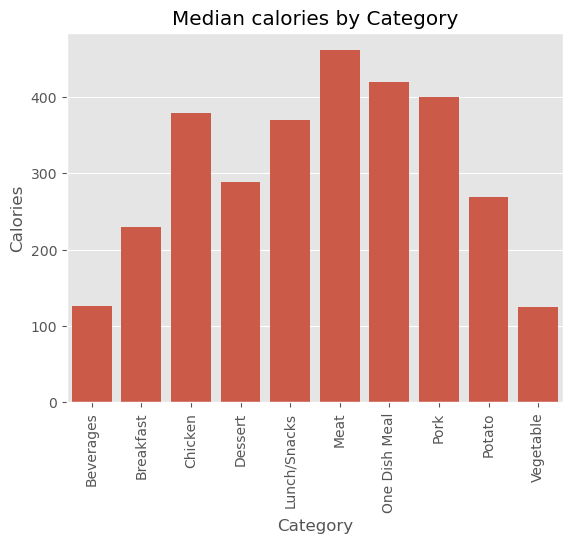

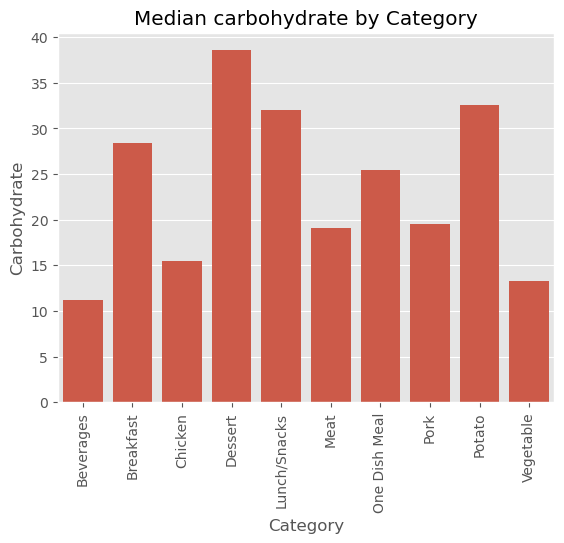

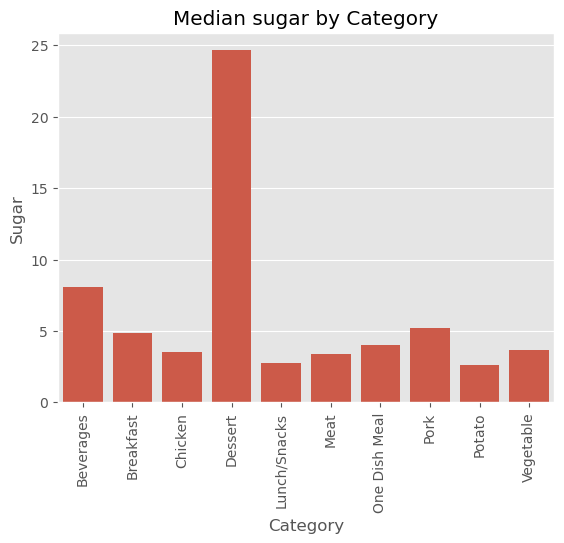

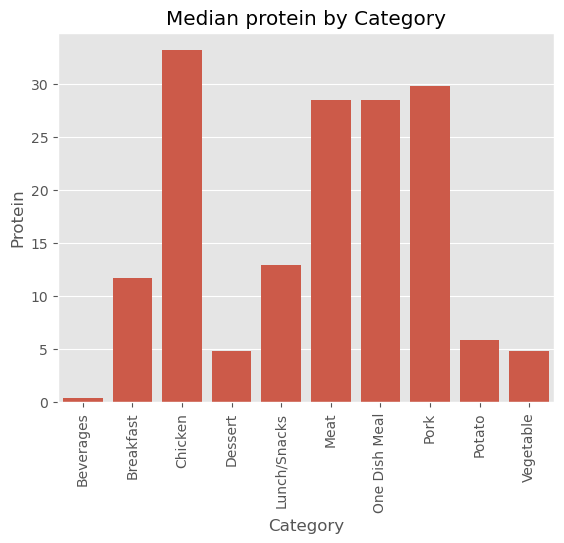

In [24]:
for i in col_med.columns:
    if i == 'category':
        continue
    sns.barplot(data=col_med, x='category', y=i)
    plt.xticks(rotation=90)
    plt.title(f'Median {i} by Category')
    plt.xlabel('Category')
    plt.ylabel(i.title())
    plt.show()

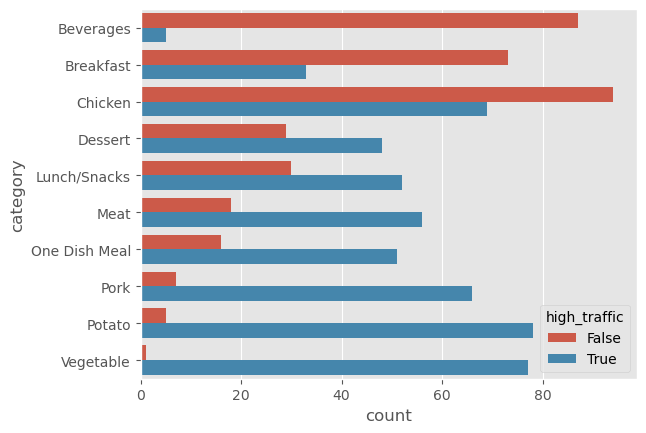

In [25]:
sns.countplot(y='category', hue='high_traffic',data=df)

plt.show()

In [26]:
# Step 1: Count recipes by category and high_traffic status
counts = df.groupby(['category', 'high_traffic']).size().unstack(fill_value=0)

# Step 2: Calculate percentage of high_traffic = True for each category
counts['high_traffic_percentage'] = counts[True] / (counts[True] + counts[False]) * 100

# Step 3 (Optional): Rename for clarity
counts = counts.rename(columns={False: 'Low Traffic Count', True: 'High Traffic Count'})
counts = counts.reset_index()
counts

C:\Users\Imago DEI\AppData\Local\Temp\ipykernel_19184\1808905493.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(['category', 'high_traffic']).size().unstack(fill_value=0)


high_traffic,category,Low Traffic Count,High Traffic Count,high_traffic_percentage
0,Beverages,87,5,5.434783
1,Breakfast,73,33,31.132075
2,Chicken,94,69,42.331288
3,Dessert,29,48,62.337662
4,Lunch/Snacks,30,52,63.414634
5,Meat,18,56,75.675676
6,One Dish Meal,16,51,76.119403
7,Pork,7,66,90.410959
8,Potato,5,78,93.975904
9,Vegetable,1,77,98.717949


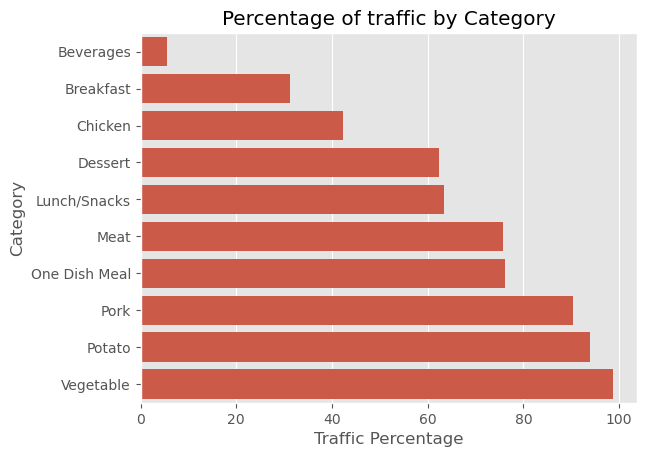

In [27]:
ax = sns.barplot(data=counts, y='category', x='high_traffic_percentage')

plt.title('Percentage of traffic by Category')
plt.ylabel('Category')
plt.xlabel('Traffic Percentage')
#plt.savefig'
plt.show()

From the vizualization above it can be observed that that recipes in the  vegetable, potato and pork categories  had the highest traffic rates when 
displayed with vegetable having a 98.7% high traffic rate. 
Meanwhile, Beverages had the lowest high traffic percentage, at just 5.4%, indicating that recipes in this category generate significantly less engagement.

Based on this insight, we can recommend that the porduct team should priortize displaying more recipes in the Vegetable, Potato and Pork categories for increased traffic on 
the site.

In [28]:
df.corr(numeric_only=True)

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic
recipe,1.000000,0.012920,0.044743,-0.027489,-0.058767,0.025526,0.026989
calories,0.012920,1.000000,-0.028970,-0.097302,0.172477,-0.034756,0.074382
carbohydrate,0.044743,-0.028970,1.000000,0.073922,-0.042795,-0.017895,0.080932
sugar,-0.027489,-0.097302,0.073922,1.000000,-0.099053,-0.008617,-0.075527
protein,-0.058767,0.172477,-0.042795,-0.099053,1.000000,-0.017926,0.044575
servings,0.025526,-0.034756,-0.017895,-0.008617,-0.017926,1.000000,0.043229
high_traffic,0.026989,0.074382,0.080932,-0.075527,0.044575,0.043229,1.000000


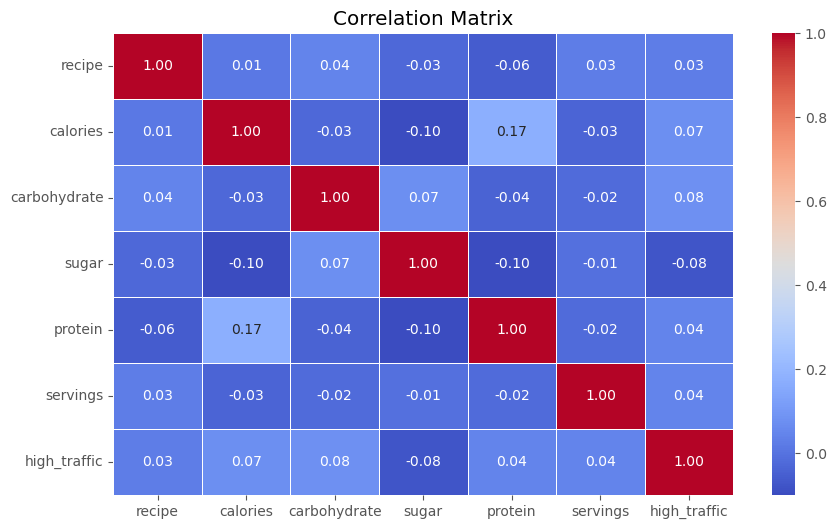

In [29]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix")
plt.savefig('correlation_matrix.png')
plt.show()


## Comment on the matrix

The correlation matix shows that most variables are weakly correlated with each other.
The values are generally close to zero indicating little to no linear relationship.
The variables have a very weak realtionship with high_traffic
Protein and Calories show the strongest positive correlation at 0.07, which suggests
a slight tendency for higher-protein recipes to have more calories.

# Model Fitting

The problem is a Binary Classification problem the goal is to classify whether a recipe will result in high traffic -- value of 1 or a low traffic -- value of 0


Before fitting model;
The skewed columns - calories, carbohydrate, sugar and protein would be transformed so that they can be normally distributed since many algorithms assume that the data is normally distributed and it improves the performance of these algorithms 

One-hot encoding will be applied to category column

The high_traffic column would be turned to zeros and ones with 1 representing True(high traffic) and zero representing False(low traffic)

The recipe column will be dropped since it just an identifier for each unique recipe

The servings columns will also be scaled using minmax scaler.

In [30]:
df

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,2,35.48,38.56,0.66,0.92,Potato,4,True
1,3,914.28,42.68,3.09,2.88,Breakfast,1,False
2,4,97.03,30.56,38.63,0.02,Beverages,4,True
3,5,27.05,1.85,0.80,0.53,Beverages,4,False
4,6,691.15,3.46,1.65,53.93,One Dish Meal,2,True
...,...,...,...,...,...,...,...,...
890,942,186.21,83.94,1.98,22.40,Chicken,4,True
891,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,False
892,945,951.74,29.42,3.57,13.87,Pork,2,True
893,946,266.61,35.77,0.97,8.07,Potato,6,True


In [31]:
skewed_df = df.select_dtypes(include=float)
skewed_cols = skewed_df

In [32]:
for i in skewed_cols.columns:
    print(i)
    skewed_cols[i] = np.log1p(skewed_cols[i])

calories
carbohydrate
sugar
protein


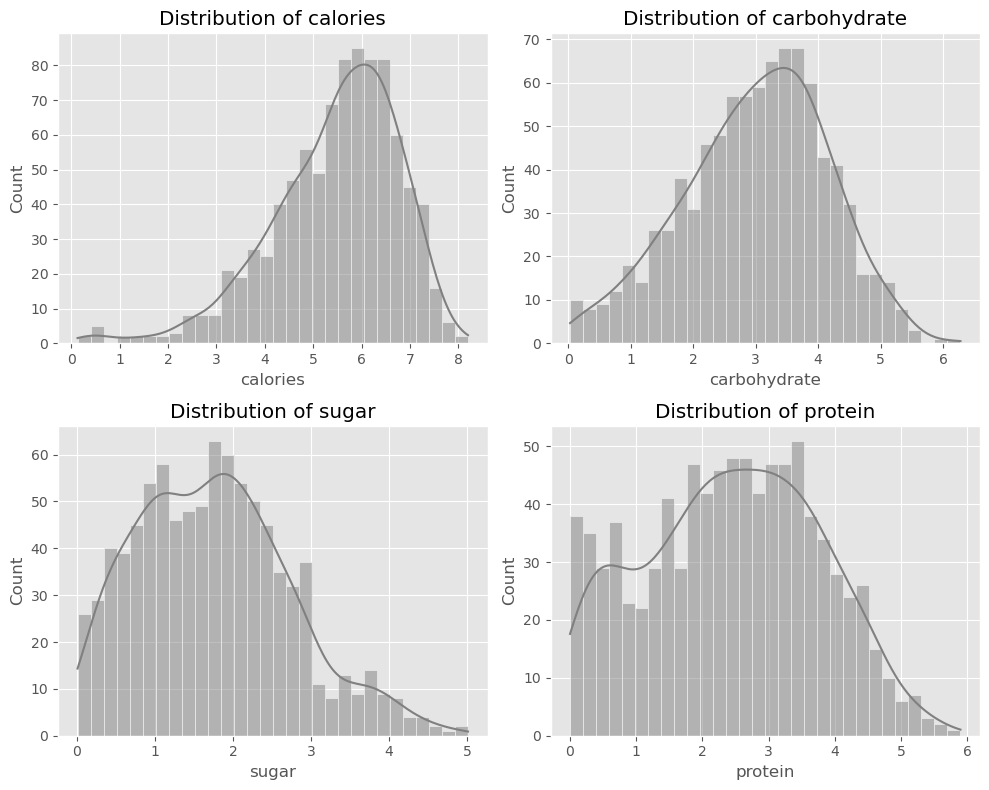

In [33]:
n_cols=2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # Flatten to 1D for easy indexing

# Plot each numerical column
for idx, col in enumerate(skewed_cols):
    sns.histplot(skewed_cols[col], bins=30, kde=True, color='gray', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')

# Turn off unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])  # remove empty plots

plt.tight_layout()
plt.savefig('Distribution_pre.png')
plt.show()

In [34]:
pt = PowerTransformer(method='yeo-johnson')

In [35]:
skewed_cols = df.select_dtypes(include=float)
skewed_col_yeo = pd.DataFrame()
skewed_col_yeo[list(skewed_cols.columns)] = pd.DataFrame(pt.fit_transform(skewed_cols[list(skewed_cols.columns)]))

In [36]:
#skewed_col_yeo = skewed_col_yeo.drop([0,1,2,3], axis=1)

In [37]:
# Create transformation functions
def apply_transformations(df):
    transformed = {}

    # 1. Log (handle 0s)
    transformed['log'] = np.log1p(df)

    # 2. Square Root
    transformed['sqrt'] = np.sqrt(df)

    # 3. Cube Root
    transformed['cbrt'] = np.cbrt(df)

    # 4. Box-Cox (only for positive values)
    boxcox_df = pd.DataFrame()
    for col in df.columns:
        if (df[col] > 0).all():  # Box-Cox requires strictly positive values
            boxcox_df[col], _ = boxcox(df[col])
        else:
            boxcox_df[col] = np.nan  # skip invalid
    transformed['boxcox'] = boxcox_df

    # 5. Yeo-Johnson
    pt = PowerTransformer(method='yeo-johnson')
    yeo = pt.fit_transform(df)
    transformed['yeo'] = pd.DataFrame(yeo, columns=df.columns, index=df.index)

    return transformed

In [38]:
def plot_distributions(transformed_data, method_name):
    df = transformed_data[method_name]
    n_cols = 2
    n_rows = int(np.ceil(len(df.columns) / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
    axes = axes.flatten()

    for idx, col in enumerate(df.columns):
        sns.histplot(df[col].dropna(), bins=30, kde=True, color='gray', ax=axes[idx])
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(f"{col} - {method_name}")
        axes[idx].set_ylabel('Count')

    # Turn off unused subplots
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.savefig(f'{method_name}.png')
    plt.show()


📈 Plotting: LOG Transformation



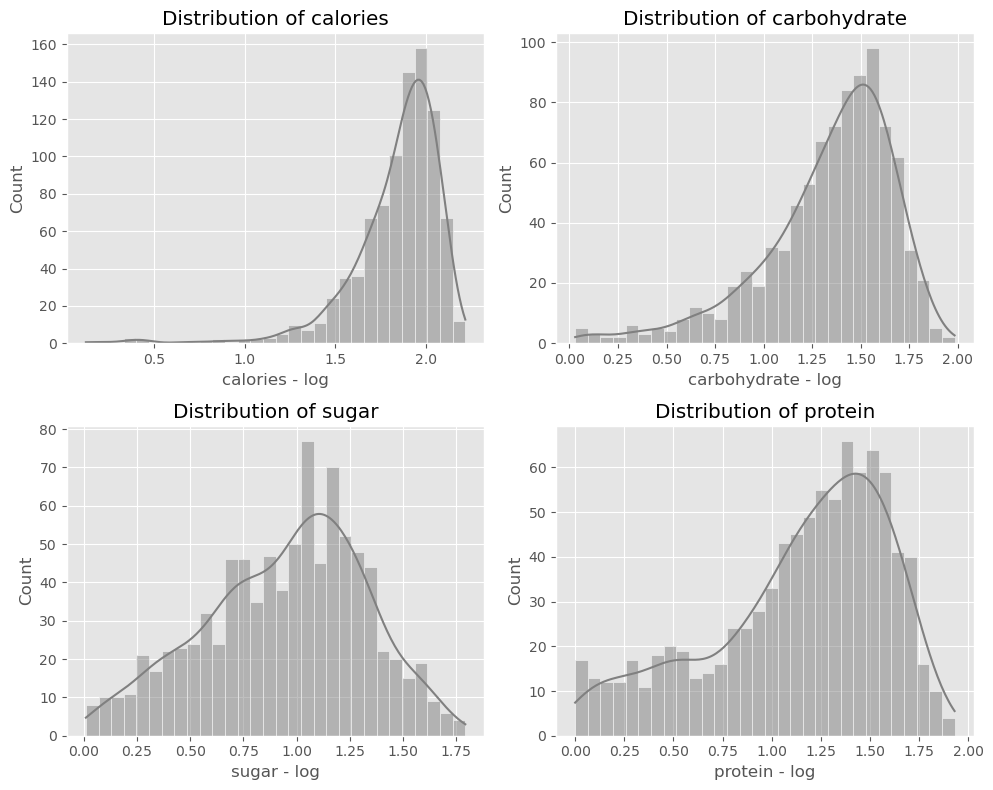


📈 Plotting: SQRT Transformation



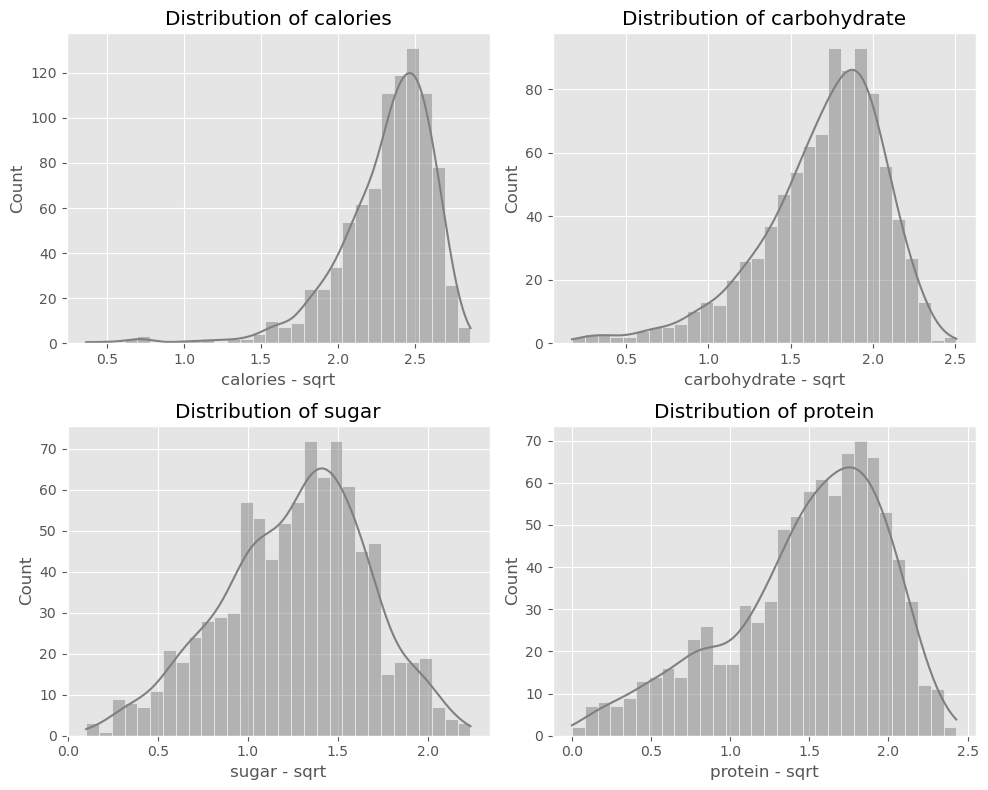


📈 Plotting: CBRT Transformation



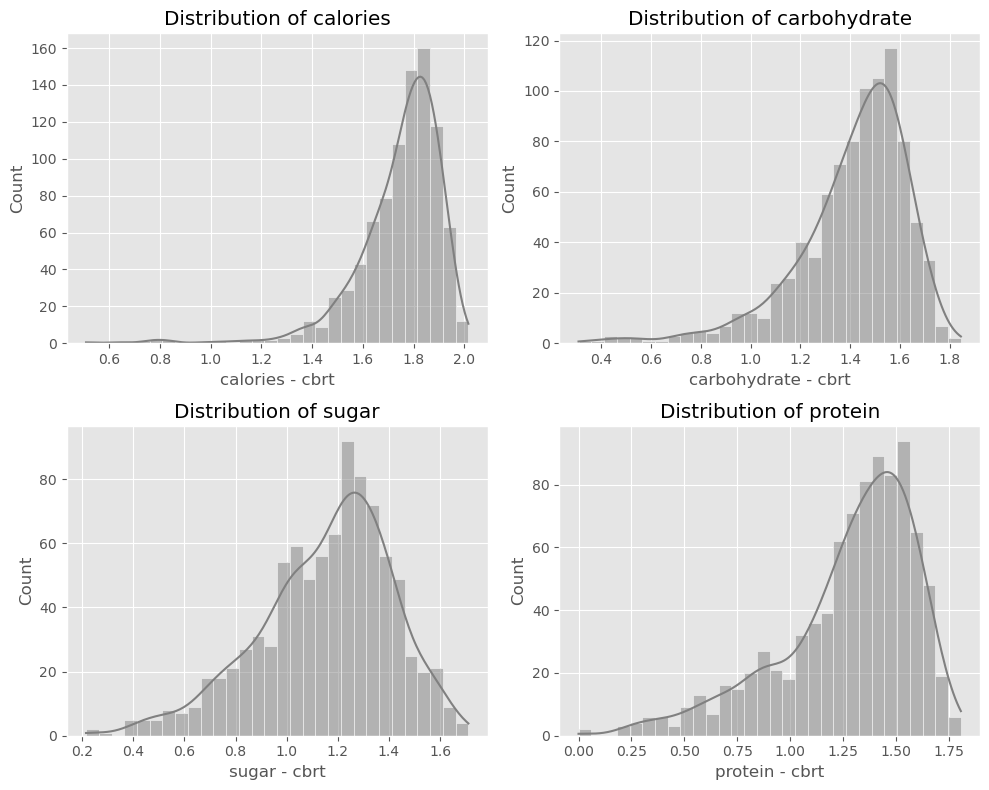


📈 Plotting: BOXCOX Transformation



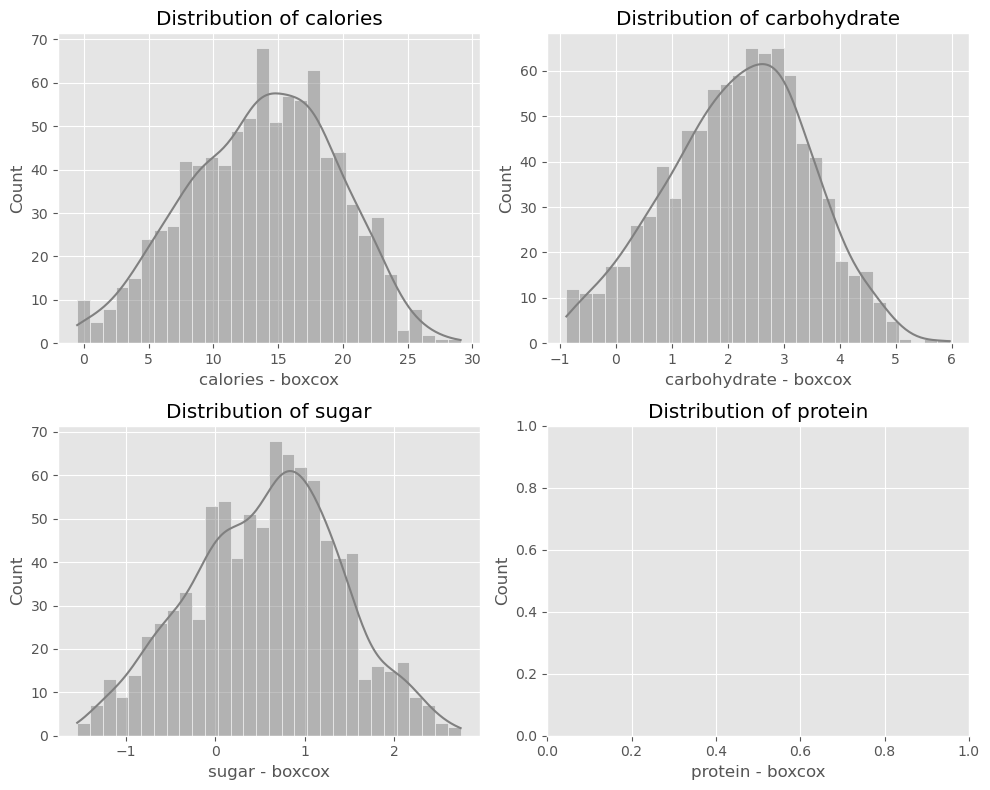


📈 Plotting: YEO Transformation



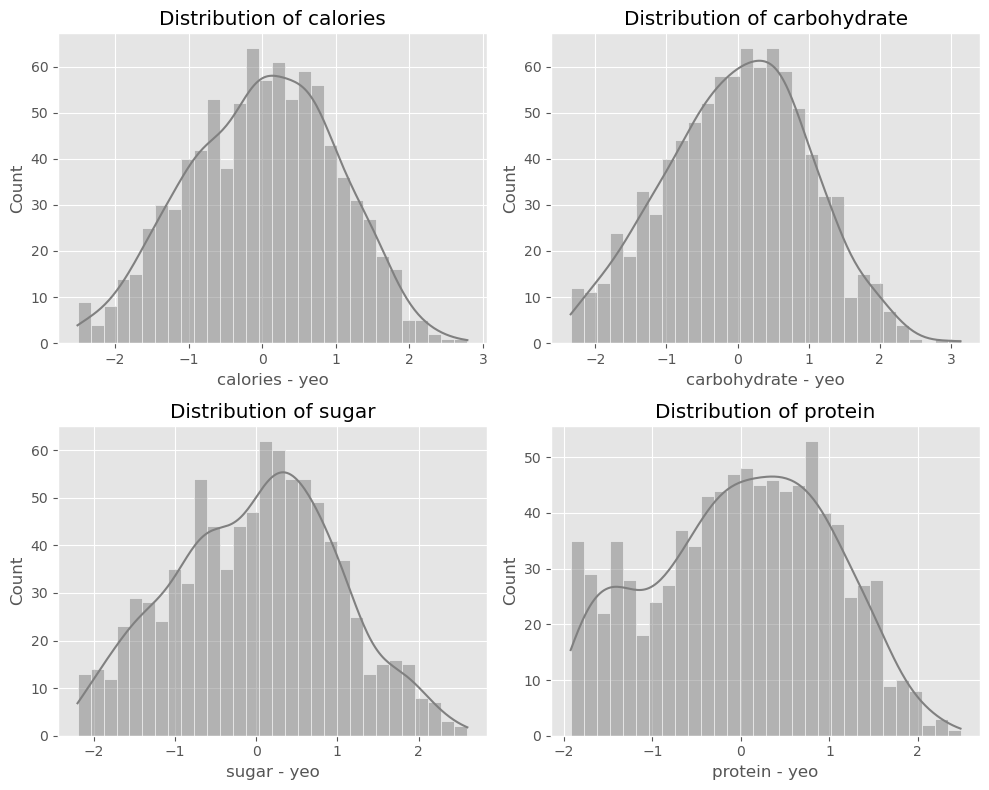

In [39]:
# Apply transformations
transformed_versions = apply_transformations(skewed_df)

# Plot each one
for method in transformed_versions:
    print(f"\n📈 Plotting: {method.upper()} Transformation\n")
    plot_distributions(transformed_versions, method)


From the graphs in the above cell we can notice that the Yeo-Johnson transformer performs best in transforming the skewed distibutions of the columns to follow a Gaussian distribution therefore I'll be applying it to the columns

In [40]:
df.head(3)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,2,35.48,38.56,0.66,0.92,Potato,4,True
1,3,914.28,42.68,3.09,2.88,Breakfast,1,False
2,4,97.03,30.56,38.63,0.02,Beverages,4,True


In [41]:
# Dropping the recipe column
df = df.drop(columns=['recipe'], axis=1)

# Making hiogh_traffic numerical
df['high_traffic'] = df['high_traffic'].map({True: 1, False:0})

df = pd.get_dummies(df, columns=['category'], prefix='', prefix_sep='',dtype=int)

In [42]:
# Defining the features and target variable
X = df.drop('high_traffic', axis=1)  # features
y = df['high_traffic']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

pre_trans = X_test.copy()
pt_split = PowerTransformer(method='yeo-johnson')

X_train[X_train.select_dtypes(include=float).columns] = pt.fit_transform(X_train.select_dtypes(include=float))
X_test[X_test.select_dtypes(include=float).columns] = pt.transform(X_test.select_dtypes(include=float))

scaler = StandardScaler()
minmax = MinMaxScaler()
#df['servings'] = scaler.fit_transform(df[['servings', 'carbohydrate', 'sugar', 'protein','calories']])
#df['servings'] = minmax.fit_transform(df[['servings', 'carbohydrate', 'sugar', 'protein','calories']])

# NOTE -- I removed servings from here
scaled = minmax.fit_transform(X_train[[ 'carbohydrate', 'sugar', 'protein', 'calories', 'servings']])
X_train[[ 'carbohydrate', 'sugar', 'protein', 'calories', 'servings']] = scaled

scaled_test = minmax.transform(X_test[[ 'carbohydrate', 'sugar', 'protein', 'calories', 'servings']])
X_test[[ 'carbohydrate', 'sugar', 'protein', 'calories', 'servings']] = scaled_test

X_train.to_csv('X_train.csv')

Now our dataset is ready to be fitted to a model for the baseline, I'll be using Logistic regression as the Baseline model

In [43]:
X_train

,calories,carbohydrate,sugar,protein,servings,Beverages,Breakfast,Chicken,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
818,0.169743,0.322815,0.456606,0.003424,0.2,1,0,0,0,0,0,0,0,0,0
413,0.347743,0.373818,0.283811,0.628362,0.0,0,0,1,0,0,0,0,0,0,0
795,0.130075,0.525877,0.123392,0.255321,0.6,0,0,0,0,0,0,0,0,0,1
76,0.164989,0.503237,0.315389,0.437370,0.0,0,1,0,0,0,0,0,0,0,0
510,0.271657,0.740623,1.000000,0.322437,0.0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,0.362809,0.603716,0.293054,0.585103,0.6,0,0,0,0,1,0,0,0,0,0
528,0.456350,0.470377,0.300175,0.387622,0.0,0,1,0,0,0,0,0,0,0,0
74,0.280354,0.161443,0.000000,0.071164,0.2,0,0,0,1,0,0,0,0,0,0
176,0.779589,0.757162,0.123392,0.065357,0.6,0,0,0,0,1,0,0,0,0,0


In [44]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

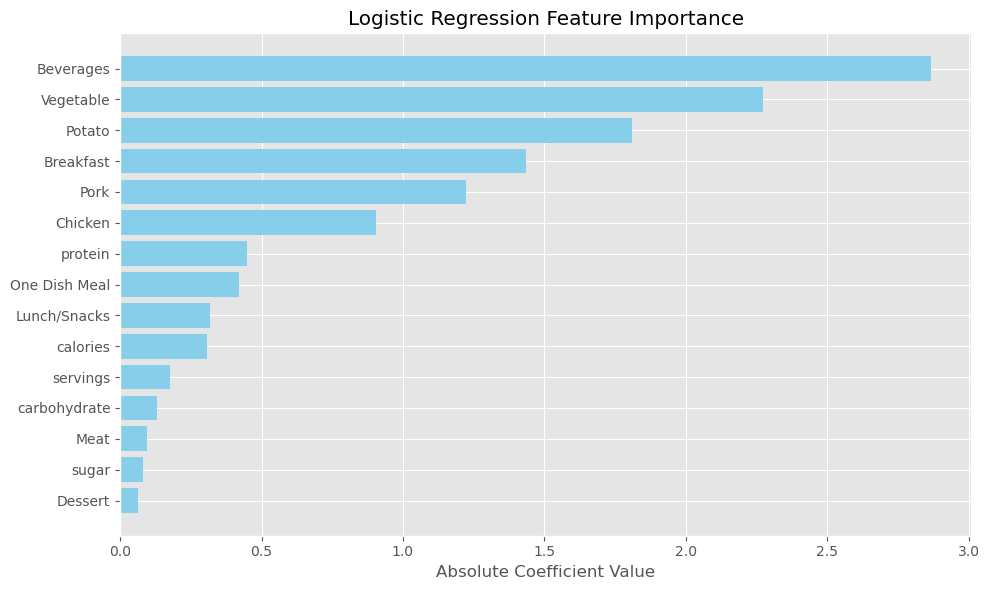

In [45]:
logreg = LogisticRegression(random_state=42) # C=1, max_iter=1000, penalty='l1', solver='saga'
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
labels = ['Low Traffic', "High Traffic"]


coefficients = logreg.coef_[0]
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients),  # Take absolute value to show strength regardless of direction
    'Coefficient': coefficients          # Optional: actual signed coefficient
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()

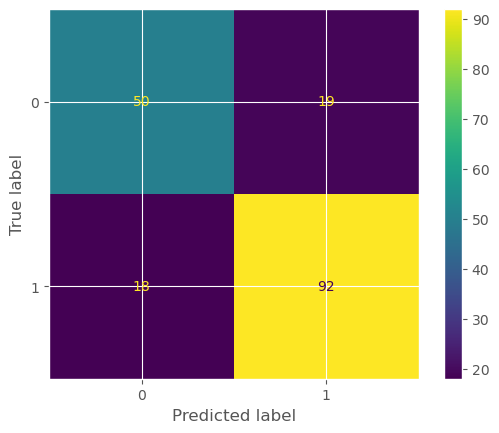

In [46]:
logreg_cm = confusion_matrix(y_test, y_pred_logreg, )
disp = ConfusionMatrixDisplay(confusion_matrix=logreg_cm, )
tn_logreg, fp_logreg, fn_logreg, tp_logreg = logreg_cm.ravel()
disp.plot()
plt.show()

In [47]:
print("Logistic Regression CLassification Report (Base Model)")
print("")
print(classification_report(y_test, y_pred_logreg, target_names=labels))

Logistic Regression CLassification Report (Base Model)

              precision    recall  f1-score   support

 Low Traffic       0.74      0.72      0.73        69
High Traffic       0.83      0.84      0.83       110

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



 Using Support Vector Machine as the comparison model

In [48]:
model_svm = SVC(probability=True)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
report_svm = classification_report(y_test, y_pred_svm, target_names=labels)

In [49]:
svm_cm = confusion_matrix(y_test, y_pred_svm,)

# Assign confusion matrix values
tn_svm, fp_svm, fn_svm, tp_svm = svm_cm.ravel()
print('SVM classification report (Comparison Model)')
print("")
print(report_svm)

SVM classification report (Comparison Model)

              precision    recall  f1-score   support

 Low Traffic       0.74      0.75      0.75        69
High Traffic       0.84      0.84      0.84       110

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



In [54]:
pre_trans.head(9)

,calories,carbohydrate,sugar,protein,servings,Beverages,Breakfast,Chicken,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
718,253.63,12.99,5.75,9.50,1,0,0,0,0,0,0,0,0,1,0
264,409.99,13.61,1.96,8.77,4,0,0,0,0,0,0,0,0,0,1
259,858.67,5.07,7.47,1.84,1,0,0,0,0,1,0,0,0,0,0
631,100.39,9.66,24.37,16.97,2,0,0,0,0,0,0,0,0,0,1
783,12.24,37.13,3.39,0.28,1,0,0,0,0,0,0,0,0,0,1
875,3633.16,29.07,0.35,2.32,4,0,0,1,0,0,0,0,0,0,0
287,649.83,21.64,1.69,0.13,2,0,0,0,0,0,1,0,0,0,0
112,28.83,31.55,38.36,3.57,2,0,0,0,1,0,0,0,0,0,0
576,1275.23,33.13,8.34,44.23,4,0,0,1,0,0,0,0,0,0,0


In [51]:
y_pred_svm

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0], dtype=int64)

From the classification reports of the models, we can observe that

Both models perform similarly, but SVM slightly edges out in terms of overall accuracy and F1-score.

Logistic Regression (Baseline model) is marginally behind the comparison but still acceptable.

Importantly, both models hit ≥0.80 precision for "High Traffic", which aligns with the business goal.

## Summary of Model Evaluation

### Logistic Regression

- **Accuracy**: 0.79  
- **Precision (High Traffic)**: 0.83  
- **Recall (High Traffic)**: 0.84  
- **F1 Score (High Traffic)**: 0.83  

|                    | Precision | Recall | F1-Score | Support |
|--------------------|-----------|--------|----------|---------|
| **Low Traffic**    | 0.74      | 0.72   | 0.73     | 69      |
| **High Traffic**   | 0.83      | 0.84   | 0.83     | 110     |


- **Macro Average**: Precision = 0.78, Recall = 0.78, F1 Score = 0.78  
- **Weighted Average**: Precision = 0.79, Recall = 0.79, F1 Score = 0.79  

---

### Support Vector Machine (SVM)

- **Accuracy**: 0.80  
- **Precision (High Traffic)**: 0.84  
- **Recall (High Traffic)**: 0.84  
- **F1 Score (High Traffic)**: 0.84  

|                    | Precision | Recall | F1-Score | Support |
|--------------------|-----------|--------|----------|---------|
| **Low Traffic**    | 0.74      | 0.75   | 0.75     | 69      |
| **High Traffic**   | 0.84      | 0.84   | 0.84     | 110     |


- **Macro Average**: Precision = 0.79, Recall = 0.79, F1 Score = 0.79  
- **Weighted Average**: Precision = 0.81, Recall = 0.80, F1 Score = 0.80  

---

## Best Model Recommendation

### Support Vector Machine (SVM)

**Reasons for Recommendation:**

- **Higher Accuracy**: SVM achieved an accuracy of **0.80**, slightly outperforming Logistic Regression (**0.79**).
- **Greater Precision**: SVM achieved **0.84 precision** for high-traffic recipes, helping to reduce the risk of showing low-traffic ones.
- **Strong Recall**: Both models matched at **0.84 recall**, but SVM balanced it with better precision.

**Implementation Considerations:**

- **Balanced Performance**: SVM maintains a strong balance between precision and recall, making it highly reliable.
- **Scalability**: Despite being more computationally intensive, SVM is feasible for real-time use on the current dataset size.

**Conclusion:**

The **SVM model** is recommended for deployment due to its **higher precision and accuracy**, aligning well with Tasty Bytes' goal of accurately featuring high-traffic recipes and increasing user engagement.


# Metric for the Business to Monitor

# Key Performace Indicator (KPI)
We define a KPI - High Traffic Precision Ratio (HTPR) by evaluating the ratio of True Positives (TP) to False Positives (FP). 
This metric reflects how often the model correctly predicts a high traffic recipe relative to how often it falsely classifies a low traffic recipe as high.

In essence, it shows how many correct high-traffic predictions we get for every one incorrect high-traffic prediction.

A higher TP/FP ratio indicates greater confidence and precision in recommending recipes likely to generate high traffic, which aligns with the business goal of minimizing poor homepage choices.

$$
\text{HTPR} = \frac{\text{True Positives (TP)}}{\text{False Positives (FP)}}
$$


In [52]:
# Comparing the Performance of models using the defined KPI - High Traffic Precision Ratio 

# For Logistic Regression
kpi_logreg = tp_logreg / fp_logreg
print(f"The High Traffic Precision Ratio  for Logistic Regression is: {kpi_logreg}")


kpi_svm = tp_svm / fp_svm
print(f"The High Traffic Precision Ratio  for Support Vector Machine is: {kpi_svm}")

The High Traffic Precision Ratio  for Logistic Regression is: 4.842105263157895
The High Traffic Precision Ratio  for Support Vector Machine is: 5.411764705882353


### KPI Evaluation: High Traffic Precision Ratio (HTPR)

The **High Traffic Precision Ratio (HTPR)** compares the number of correctly predicted high-traffic recipes (True Positives) to the number of incorrectly predicted high-traffic recipes (False Positives). It tells us, on average, how many correct "High Traffic" predictions the model makes before making one incorrect one.

- **Logistic Regression HTPR**: 4.84  
- **Support Vector Machine HTPR**: 5.41

Both models **exceed the business KPI threshold** of 4.0 (since 80% precision implies that out of every 5 predicted high-traffic recipes, 4 should be correct), meaning they are reliably identifying high-traffic recipes. However, the **SVM model shows a stronger HTPR**, correctly identifying more high-traffic recipes per incorrect prediction than Logistic Regression.

### Interpretation:

- SVM returns approximately **5 correct high-traffic predictions** for every incorrect one.
- Logistic Regression returns about **4 correct predictions** per incorrect one.
- Therefore, **SVM not only has better precision but also provides greater confidence in homepage recipe selections**, making it a **better fit for deployment**.


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation